In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import joblib

import tensorflow as tf

2024-09-13 07:42:00.646255: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-13 07:42:00.724805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-13 07:42:01.852771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
hd = pd.read_csv('boston_housing.csv')

<AxesSubplot: xlabel='RM', ylabel='PRICE'>

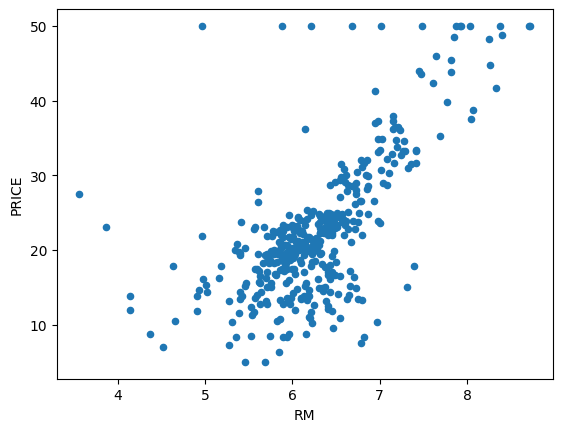

In [3]:
hd.plot.scatter(x='RM',y='PRICE')

In [ ]:
nhdi = hd[(hd['PRICE'] > 45) | (hd['RM'] < 4)].index

In [ ]:
nhd = hd.drop(nhdi)

In [ ]:
nhd.plot.scatter(x='RM',y='PRICE')

In [ ]:
x_train,y_train = nhd.RM.values[:-100], nhd.PRICE.values[:-100]

In [ ]:
x_test,y_test = nhd.RM.values[-100:], nhd.PRICE.values[-100:]

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(1))


In [ ]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = model.fit(x_train,y_train,validation_split=0.1,epochs=300,verbose=2)

In [ ]:
plot.plot(history.history['root_mean_squared_error'],color='g')
plot.plot(history.history['val_root_mean_squared_error'],color='r')


In [ ]:
x = tf.linspace(4,12,10)

In [ ]:
y = model.predict(x)

In [ ]:
plot.scatter(x_train,y_train,alpha=0.5)
plot.plot(x,y,color='red')